# Visualizing Geospatial Data in Python

https://campus.datacamp.com/courses/visualizing-geospatial-data-in-python


In [1]:
import data_manipulation as dm
import geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point, Polygon

pd.options.display.max_columns = 100

## C1

In [2]:
school_districts = gpd.read_file("data/school_districts.geojson")
school_districts.info()
school_districts.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   first_name  9 non-null      object  
 1   city        9 non-null      object  
 2   zip         9 non-null      object  
 3   email       9 non-null      object  
 4   state       9 non-null      object  
 5   last_name   9 non-null      object  
 6   address     9 non-null      object  
 7   position    9 non-null      object  
 8   term_expir  9 non-null      object  
 9   district    9 non-null      object  
 10  phone       9 non-null      object  
 11  geometry    9 non-null      geometry
dtypes: geometry(1), object(11)
memory usage: 992.0+ bytes


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## C2

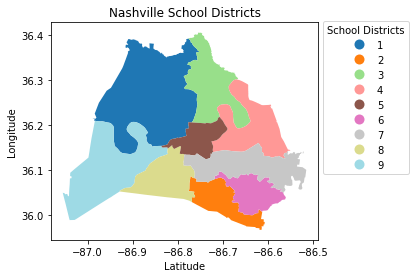

In [3]:
# Set legend style
lgnd_kwds = {"title": "School Districts", "loc": "upper left", "bbox_to_anchor": (1, 1.03), "ncol": 1}

# Plot the school districts using the tab20 colormap (qualitative)
school_districts.plot(column = "district", cmap = "tab20", legend = True, legend_kwds = lgnd_kwds)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Nashville School Districts")
plt.show();

In [4]:
neighborhoods = gpd.read_file("data/neighborhoods.geojson")
neighborhoods.info()
neighborhoods.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      288 non-null    object  
 1   geometry  288 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.6+ KB


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,West Meade,"MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ..."
4,White Bridge,"MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ..."


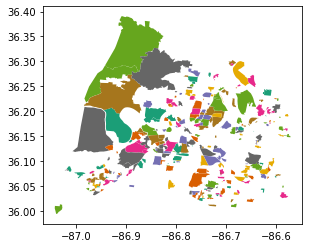

In [5]:
# Print the first few rows of neighborhoods
display(neighborhoods.head())

# Plot the neighborhoods, color according to name and use the Dark2 colormap
neighborhoods.plot(column = 'name', cmap = 'Dark2')

# Show the plot.
plt.show()

In [6]:
# Print the first row of school districts GeoDataFrame and the crs
display(school_districts.head(1))
print(school_districts.crs)

# Convert the crs to epsg:3857
school_districts.geometry = school_districts.geometry.to_crs(epsg = 3857)
                        
# Print the first row of school districts GeoDataFrame and the crs again
display(school_districts.head(1))
print(school_districts.crs)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."


epsg:4326


,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-9659344.056 4353528.767, -965..."


epsg:3857


In [7]:
import ast

art = pd.read_csv("data/public_art.csv")
art["Mapped Location"] = art["Mapped Location"].apply(ast.literal_eval)

# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            132 non-null    object 
 1   Last Name        132 non-null    object 
 2   First Name       122 non-null    object 
 3   Location         131 non-null    object 
 4   Medium           128 non-null    object 
 5   Type             132 non-null    object 
 6   Description      87 non-null     object 
 7   Latitude         132 non-null    float64
 8   Longitude        132 non-null    float64
 9   Mapped Location  132 non-null    object 
 10  geometry         132 non-null    object 
dtypes: float64(2), object(9)
memory usage: 11.5+ KB


In [8]:
# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs=neighborhoods.crs, geometry=art["geometry"])
art_geo.info()
art_geo.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Title            132 non-null    object  
 1   Last Name        132 non-null    object  
 2   First Name       122 non-null    object  
 3   Location         131 non-null    object  
 4   Medium           128 non-null    object  
 5   Type             132 non-null    object  
 6   Description      87 non-null     object  
 7   Latitude         132 non-null    float64 
 8   Longitude        132 non-null    float64 
 9   Mapped Location  132 non-null    object  
 10  geometry         132 non-null    geometry
dtypes: float64(2), geometry(1), object(8)
memory usage: 11.5+ KB


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
art_geo.head()

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.83660 36.12856)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774 36.16234)
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.15790,-86.78817,"(36.1579, -86.78817)",POINT (-86.78817 36.15790)
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.16202,-86.79975,"(36.16202, -86.79975)",POINT (-86.79975 36.16202)
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215)


In [10]:
print(art_geo.crs)
print(neighborhoods.crs)

epsg:4326
epsg:4326


In [11]:
# Spatially join art_geo and neighborhoods
art_intersect_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'intersects')

# Print the shape property of art_intersect_neighborhoods
print(art_intersect_neighborhoods.shape)

(40, 13)


In [12]:
# Spatially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op = 'within')

# Print the first few rows
neighborhood_art.head()

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,name
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774 36.16234),41,Urban Residents
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents
21,Chet Atkins,Faxon,Russell,"Corner of Fifth Avenue North and Union Street,...",Bronze stool and guitar on a granite plynth,Sculpture,A sculpture of a young Chet Atkins seated on a...,36.16466,-86.78102,"(36.16466, -86.78102)",POINT (-86.78102 36.16466),41,Urban Residents
22,Children's Chairs For The Seasons,McGraw,Deloss,"615 Church Street, Nashville TN",Mixed Media - wood and paint,Furniture,chairs depicting the four seasons,36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents
34,Foliated Scroll,Bloomer,Kent,"615 Church Street, Nashville TN",Aluminum,Frieze,a contemporary adaptation of a classical folia...,36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents


In [13]:
# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'Title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
neighborhood_art_grouped.agg('count').sort_values(by = 'Title', ascending = False)

,Title
name,
Urban Residents,22
Lockeland Springs,3
Edgehill (ONE),2
Germantown,2
Hillsboro-West End,2
Inglewood,2
Sunnyside,2
Chestnut Hill (TAG),1
Historic Edgefield,1


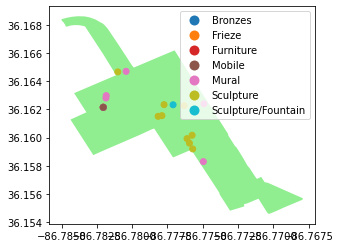

In [14]:
# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == "Urban Residents"]

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Plot the urban_polygon as ax  
ax = urban_polygon.plot(color = 'lightgreen')

# Add a plot of the urban_art and show it
urban_art.plot( ax = ax, column = 'Type', legend = True);
plt.show()

In [15]:
council_districts = gpd.read_file("data/council_districts.geojson")
council_districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   first_name  35 non-null     object  
 1   email       35 non-null     object  
 2   res_phone   34 non-null     object  
 3   bus_phone   34 non-null     object  
 4   last_name   35 non-null     object  
 5   position    35 non-null     object  
 6   district    35 non-null     object  
 7   geometry    35 non-null     geometry
dtypes: geometry(1), object(7)
memory usage: 2.3+ KB


## C3

In [16]:
# Print the head of the urban polygon 
display(urban_polygon.head())

# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg = 3857)
display(urban_poly_3857.head())

# Print the area of urban_poly_3857 in kilometers squared
area = urban_poly_3857.geometry.area / 10**6
print('The area of the Urban Residents neighborhood is ', area.values[0], ' km squared')

,name,geometry
41,Urban Residents,"MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ..."


,name,geometry
41,Urban Residents,"MULTIPOLYGON (((-9660441.281 4323289.005, -966..."


The area of the Urban Residents neighborhood is  1.1289896057984288  km squared


<class 'geopandas.geoseries.GeoSeries'>


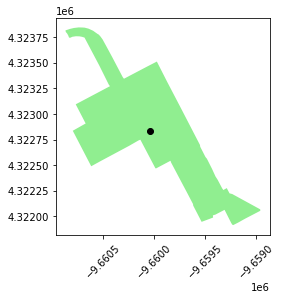

In [17]:
# Create downtown_center from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center 
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color = 'lightgreen')
downtown_center.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

In [18]:
# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry = art.geometry, crs = {'init': 'epsg:4326'})
display(art_dist_meters.head(2))

# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg = 3857)
display(art_dist_meters.head(2))

# Add a column to art_meters, center
center_point = Point(-9660034.312198792, 4322835.782813124)
art_dist_meters['center'] = center_point

/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.83660 36.12856)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774 36.16234)


,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-9666606.094 4318325.479)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-9660053.829 4322982.159)


In [19]:
# Import package for pretty printing
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['Title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(ctr)

# Print the art_distances
pprint.pprint(art_distances)

{'12th & Porter Mural': 1269.1502879119878,
 'A Splash of Color': 2471.774738455904,
 'A Story of Nashville': 513.5632030470281,
 'Aerial Innovations Mural': 4516.755210408422,
 'Airport Sun Project': 12797.594229783645,
 'Andrew Jackson': 948.9812821640502,
 'Angel': 10202.565989739454,
 'Anticipation': 688.8349105273556,
 'April Baby': 4779.394424949201,
 'Arial Triangle [from the Gravity Series]': 4315.322141146862,
 'Ariel': 4380.927773956353,
 'Athena Parthenos': 4294.778095689335,
 'Benedictio': 5313.624214291833,
 'Bicycle Bus-Green Fleet': 468.08286355623386,
 'Blowing Bubbles': 10202.565989739454,
 'Breaking Bread': 1279.2562933101267,
 'Building a Positive Community': 2253.4179974171784,
 'Can-Do': 5648.0863220822475,
 'Chet Atkins': 604.4489448101176,
 "Children's Chairs For The Seasons": 513.5632030470281,
 'Confederate Memorial': 5313.624214291833,
 'Confederate Private Monument': 4316.459103419423,
 'Confluence': 2918.52441210167,
 'Cool Fences': 6491.846030117232,
 'Danc

In [20]:
# Print the head of the urban_polygon
display(urban_polygon.head())

# Create urban_center from the urban_polygon center
urban_polygon["center"] = urban_polygon.geometry.centroid
urban_center = urban_polygon.center.values[0]

# Print urban_center
print(urban_center)

# Create array for folium called urban_location
urban_location = [urban_center.y, urban_center.x]

# Print urban_location
print(urban_location)

,name,geometry
41,Urban Residents,"MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ..."


POINT (-86.77756457127047 36.16127820928791)
[36.161278209287914, -86.77756457127047]


<ipython-input-20-9bbc803018da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_polygon["center"] = urban_polygon.geometry.centroid


In [21]:
import folium

# Construct a folium map with urban_location
downtown_map = folium.Map(location = urban_location, zoom_start = 15)

# Display the map
display(downtown_map)

In [22]:
# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.center.values[0]
folium_loc = [point.y, point.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Display the map
display(downtown_map)

In [23]:
# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
    print('first part: ', row[0])
    print('second part: ', row[1])

# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    marker = folium.Marker(location = location)
    marker.add_to(downtown_map)

# Display the map
display(downtown_map)

first part:  1
second part:  Title                  [Fourth and Commerce Sculpture]
Last Name                                       Walker
First Name                                         Lin
Location             333 Commerce Street, Nashville TN
Medium                                             NaN
Type                                         Sculpture
Description                                        NaN
Latitude                                       36.1623
Longitude                                     -86.7777
Mapped Location                  (36.16234, -86.77774)
geometry           POINT (-86.77774000000001 36.16234)
index_right                                         41
name                                   Urban Residents
Name: 1, dtype: object
first part:  4
second part:  Title                                           A Story of Nashville
Last Name                                                     Ridley
First Name                                                      Gr

In [24]:
# Print the urban_art titles
display(urban_art.Title)

#Print the urban_art descriptions
display(urban_art.Description)

# Replace Nan and ' values in description
urban_art.Description.fillna('', inplace = True)
urban_art.Description = urban_art.Description.str.replace("'", "`")

#Print the urban_art descriptions again
display(urban_art.Description)

1                        [Fourth and Commerce Sculpture]
4                                   A Story of Nashville
21                                           Chet Atkins
22                     Children's Chairs For The Seasons
34                                       Foliated Scroll
39                                          Gone Fishing
40                             Happy Times at The Arcade
54                                     Johnny Cash Mural
55                                 La Storia della Terra
57                                 Les Paul Guitar Mural
59                                         Library Doors
60                               Lightning Wire Fountain
66     Nashville, A History through Maps and Aerial V...
67                                               Oh, Roy
68                                  Orpheus and Eurydice
75                               Piecing It All Together
104                                  The Birth of Apollo
105                            

1                                                    NaN
4      Inside the Grand Reading Room, this is a serie...
21     A sculpture of a young Chet Atkins seated on a...
22                     chairs depicting the four seasons
34     a contemporary adaptation of a classical folia...
39     Just having some fun with Trompe L'oeil balconies
40          Trompe L'oeil artwork celebrating The Arcade
54     Classic street art by Thoughts Manifested crew...
55     A 20 foot tower of stone books. There are 26 b...
57                                                   NaN
59     images of local people as well as Tennessee an...
60                                                   NaN
66     Eight scenes showing the development of Nashvi...
67     Minnie Pearl and Roy Acuff seated on a bench i...
68     Relief sculpture above main entrance of Scherm...
75                                                   NaN
104    Two figures topping a fountain, one with a lyr...
105    Statue commemorating Ken

/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1                                                       
4      Inside the Grand Reading Room, this is a serie...
21     A sculpture of a young Chet Atkins seated on a...
22                     chairs depicting the four seasons
34     a contemporary adaptation of a classical folia...
39     Just having some fun with Trompe L`oeil balconies
40          Trompe L`oeil artwork celebrating The Arcade
54     Classic street art by Thoughts Manifested crew...
55     A 20 foot tower of stone books. There are 26 b...
57                                                      
59     images of local people as well as Tennessee an...
60                                                      
66     Eight scenes showing the development of Nashvi...
67     Minnie Pearl and Roy Acuff seated on a bench i...
68     Relief sculpture above main entrance of Scherm...
75                                                      
104    Two figures topping a fountain, one with a lyr...
105    Statue commemorating Ken

In [25]:
urban_art.head(1)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,name
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774 36.16234),41,Urban Residents


https://campus.datacamp.com/courses/visualizing-geospatial-data-in-python/geoseries-and-folium?ex=14

In [26]:
# Construct downtown map
nashville = [36.16127820928791, -86.77756457127047]
urban_polygon.drop(columns=["center"], inplace=True)

downtown_map = folium.Map(Location = nashville, zoom_start = 15)
folium.GeoJson(urban_polygon).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = (str(row_values['Title']) + ': ' + 
             str(row_values['Description'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(downtown_map)

# Display the map.
display(downtown_map)

/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
